<a href="https://colab.research.google.com/github/Sweksha45/LGMVIP-DataScience-EDA-on-TERRORISM-DATASET/blob/main/EDA_on_TERRORISM_DATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [39]:
df=pd.read_csv("/content/globalterrorismdb_0718dist.csv", encoding="latin1")
df.head()

<ipython-input-39-a617796738f5>:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/content/globalterrorismdb_0718dist.csv", encoding="latin1")


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32205 entries, 0 to 32204
Columns: 135 entries, eventid to related
dtypes: float64(56), int64(22), object(57)
memory usage: 33.2+ MB


In [28]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                     'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                     'nwound': 'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                     'weaptype1_txt':'Weapon_type','motive':'Motive'
                    },inplace=True)

In [30]:
data = df[['Year','Month','Day','Country','Region','state','city','latitude','longitude','AttackType','Killed','Wounded','Target',
            'Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32205 entries, 0 to 32204
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         32205 non-null  int64  
 1   Month        32205 non-null  int64  
 2   Day          32205 non-null  int64  
 3   Country      32205 non-null  object 
 4   Region       32205 non-null  object 
 5   state        32084 non-null  object 
 6   city         32205 non-null  object 
 7   latitude     30520 non-null  float64
 8   longitude    30520 non-null  float64
 9   AttackType   32205 non-null  object 
 10  Killed       26591 non-null  float64
 11  Wounded      24805 non-null  float64
 12  Target       31836 non-null  object 
 13  Target       31836 non-null  object 
 14  Summary      1110 non-null   object 
 15  Group        32205 non-null  object 
 16  Target_type  32205 non-null  object 
 17  Weapon_type  32205 non-null  object 
 18  Motive       839 non-null    object 
dtypes: f

In [31]:
data.shape

(32205, 19)

In [35]:
print("Most Attacked")
print("Country : ",data['Country'].value_counts().idxmax())
print('Region :',data['Region'].value_counts().idxmax())
print('Year : ',data['Year'].value_counts().idxmax())
print('Month : ',data['Month'].value_counts().idxmax())
print('Type: ',data['AttackType'].value_counts().idxmax())
print('Motive: ',data['Motive'].value_counts().idxmax())

Most Attacked
Country :  El Salvador
Region : Western Europe
Year :  1984
Month :  5
Type:  Bombing/Explosion
Motive:  Unknown


<ipython-input-42-b08f84491991>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()# plot the heatmap


<Axes: >

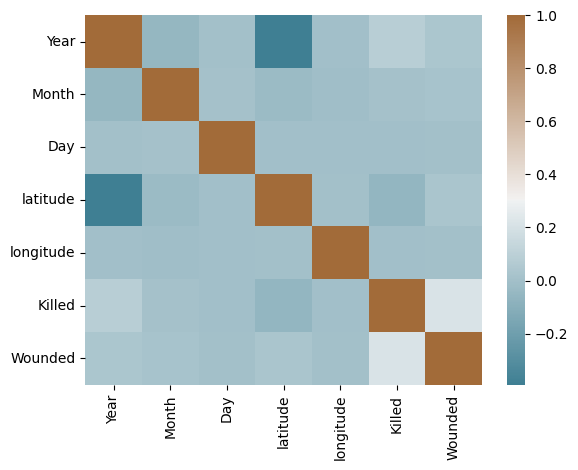

In [42]:
corr = data.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 40, as_cmap=True))

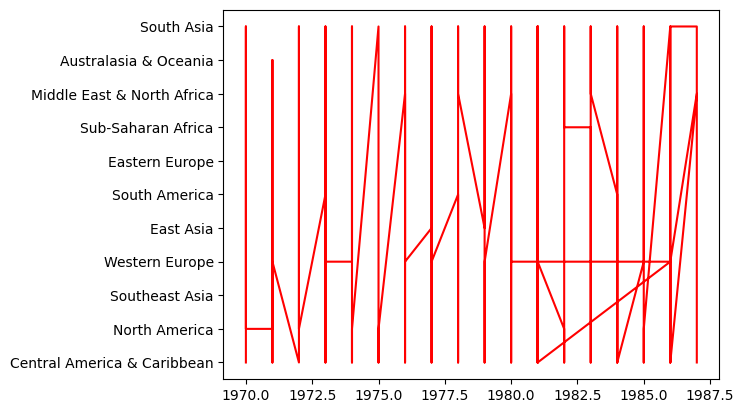

In [52]:
plt.plot(data["Year"],data["Region"], color="red")


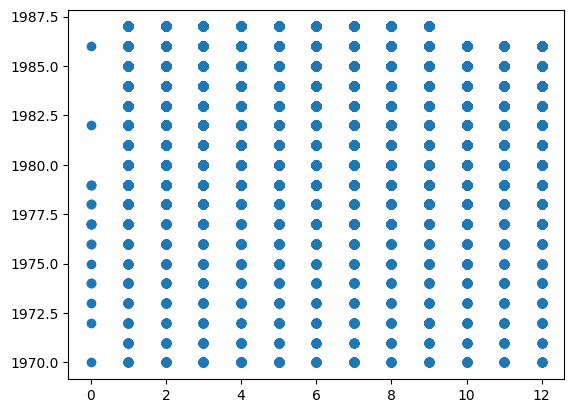

In [62]:
plt.scatter(data["Month"],data["Year"])

In [63]:
import plotly.express as px

# Group the data by country and count the number of attacks
country_counts = data['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Attack Count']

# Create the choropleth map
fig = px.choropleth(country_counts,
                    locations='Country',
                    locationmode='country names',
                    color='Attack Count',
                    title='Terrorist Attacks by Country',
                    labels={'Attack Count': 'Number of Attacks'},
                    hover_name='Country',
                    color_continuous_scale='Reds')

fig.show()

In [66]:
import plotly.graph_objects as go

# Group the data by year and count the number of attacks
yearly_counts = data['Year'].value_counts().sort_index()

# Create the time series plot
fig = go.Figure(data=go.Scatter(x=yearly_counts.index,
                               y=yearly_counts.values,
                               mode='lines',
                               name='Number of Attacks'))

fig.update_layout(title='Terrorist Attacks Over Time',
                  xaxis_title='Year',
                  yaxis_title='Number of Attacks',
                  hovermode='x unified')

fig.show()

In [68]:
region_attack_counts = data.groupby(['Region', 'AttackType']).size().reset_index()
region_attack_counts.columns = ['Region', 'AttackType', 'Attack Count']

# Create the stacked bar chart
fig = px.bar(region_attack_counts,
             x='Region',
             y='Attack Count',
             color='AttackType',
             title='Terrorist Attacks by Region and Type',
             labels={'Attack Count': 'Number of Attacks'},
             hover_name='AttackType',
             barmode='stack')

fig.show()

In [69]:
group_counts = data['Group'].value_counts().reset_index()
group_counts.columns = ['Group', 'Attack Count']

# Create the sunburst chart
fig = go.Figure(go.Sunburst(
    labels=group_counts['Group'],
    parents=["" for _ in group_counts['Group']],
    values=group_counts['Attack Count']
))

fig.update_layout(
    title='Terrorist Attacks by Group',
    hovermode='closest'
)

fig.show()